In [1]:
# --- Step 1: Import Necessary Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Import the built-in Iris dataset from sklearn
from sklearn.datasets import load_iris

# Set Seaborn style for better visualization
sns.set_style("whitegrid")


In [2]:
# --- Step 2: Load and Prepare the Dataset (Iris Dataset) ---

# Load the Iris dataset
iris = load_iris()
# Convert the data to a DataFrame for easier manipulation and inspection
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target # Add the target column

print("--- First 5 Rows of the Iris Dataset ---")
print(df.head())
print("\n" + "="*60 + "\n")

print("--- Dataset Information ---")
df.info()
print("\n" + "="*60 + "\n")

# Separate features (sepal/petal measurements) and target (flower species)
X = df.drop('target', axis=1)
y = df['target']

# Get class names (the flower species) for labeling
class_names = iris.target_names


--- First 5 Rows of the Iris Dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null  

In [3]:
# --- Step 3: Split Data into Training and Testing Sets ---
# Using 70% training and 30% testing split
# Stratify ensures equal proportions of the three Iris species in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("--- Data Split ---")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
print("\n" + "="*60 + "\n")


--- Data Split ---
Training Data Shape: (105, 4)
Testing Data Shape: (45, 4)




In [4]:
# --- Step 4: Implement Bayesian Decision Theory using Gaussian Naive Bayes ---

# Initialize the Gaussian Naive Bayes classifier
# Assumes feature distributions are Gaussian (Normal) within each species class.
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")
print("The model has learned the prior probabilities and Gaussian likelihood distributions for each feature and class.")
print("\n" + "="*60 + "\n")


Model training complete.
The model has learned the prior probabilities and Gaussian likelihood distributions for each feature and class.




In [5]:
# --- Step 5: Make Predictions on the Test Set ---
y_pred = model.predict(X_test)

# Posterior probabilities for each class (P(Species|Features))
posterior_probs = model.predict_proba(X_test)


--- Model Evaluation ---
Accuracy: 91.11%
Accuracy represents the proportion of correctly classified samples.

--- Classification Report (Precision, Recall, F1-Score) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



--- Confusion Matrix ---
Confusion matrix plot saved as 'confusion_matrix_iris_bayes.png'




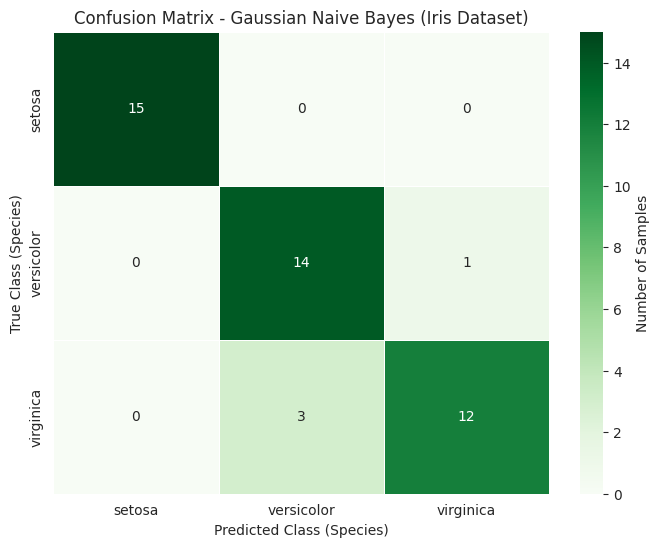

In [6]:
# --- Step 6: Evaluate the Classifier's Performance ---

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.2%}")
print("Accuracy represents the proportion of correctly classified samples.\n")

# Classification Report
print("--- Classification Report (Precision, Recall, F1-Score) ---")
print(classification_report(y_test, y_pred, target_names=class_names))
print("\n" + "="*60 + "\n")

# Confusion Matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=.5, cbar_kws={'label': 'Number of Samples'})
plt.xlabel('Predicted Class (Species)')
plt.ylabel('True Class (Species)')
plt.title('Confusion Matrix - Gaussian Naive Bayes (Iris Dataset)')

plt.savefig('confusion_matrix_iris_bayes.png')
print("Confusion matrix plot saved as 'confusion_matrix_iris_bayes.png'")
print("\n" + "="*60 + "\n")


In [7]:
# --- Step 7: Interpretation of a Prediction Example ---
print("--- Example of a Single Prediction ---")

# Choose a sample from the test set
sample_index = 5
sample_features = X_test.iloc[sample_index].values
true_class = y_test.iloc[sample_index]
predicted_class_index = y_pred[sample_index]
probabilities = posterior_probs[sample_index]

print(f"Features of Sample #{sample_index} (Sepal/Petal Measurements): {sample_features}")
print(f"True Class (Species): {class_names[true_class]} (Index: {true_class})")
print(f"Predicted Class (Highest Probability): {class_names[predicted_class_index]} (Index: {predicted_class_index})\n")

print("Posterior Probabilities calculated by the model:")
for i, class_name in enumerate(class_names):
    print(f"  P(Class {class_name} | features) = {probabilities[i]:.4f}")


--- Example of a Single Prediction ---
Features of Sample #5 (Sepal/Petal Measurements): [6.7 3.1 5.6 2.4]
True Class (Species): virginica (Index: 2)
Predicted Class (Highest Probability): virginica (Index: 2)

Posterior Probabilities calculated by the model:
  P(Class setosa | features) = 0.0000
  P(Class versicolor | features) = 0.0000
  P(Class virginica | features) = 1.0000
